## **VISÃO COMPUTACIONAL - AULA 01**

**Objetivos da aula:**

*   apreender os diversos métodos de obtenção de imagens/vídeos em OpenCV
*   aprender a gravar imagens
*   acessar propriedades de imagens
*   acessar pixels individuais de imagens e modificá-los
*   configurar regiões de interesse (ROI) para processamento
*   decompor e fazer junção de canais de imagens











#### **LEITURA DE UMA IMAGEM**

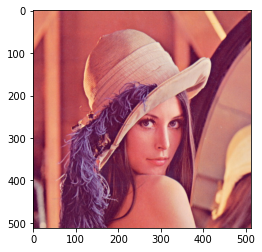

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt
import sys

%matplotlib inline

img = cv.imread("lena.jpg")
if img is None:
    sys.exit("Could not read the image.")
    
plt.imshow(img[...,::-1]);

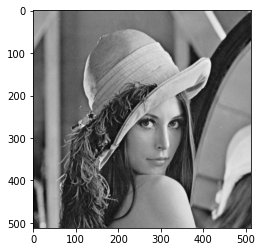

In [17]:
# Image transformation from BGR Color Space to Grayscale Space
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap=plt.cm.gray);

In [18]:
cv.imwrite("lena_gray.png", img)

True

### **LEITURA DE VÍDEO**

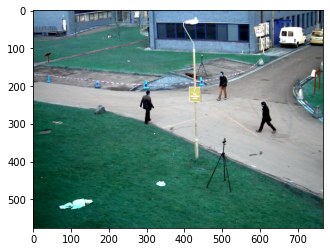

In [21]:
import numpy as np
import cv2 as cv
import sys

cap = cv.VideoCapture('video.avi')
# Show the first 5 video frames
for i in range(6):
# Se quiser mostrar todos os frames do vídeo, basta usar o loop comentado  
#while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    plt.imshow(frame)
cap.release()

### **LEITURA DE IMAGENS A PARTIR DE UMA CÂMERA**

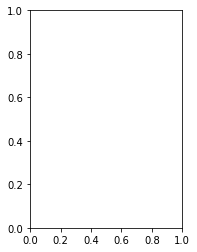

In [69]:
import cv2
import matplotlib.pyplot as plt

def grab_frame(cap):
    ret, frame = cap.read()
    if frame is None:
        return None
    return cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

#Initiate the two cameras
cap1 = cv2.VideoCapture(0)

ax1 = plt.subplot(1,2,2)
frame = grab_frame(cap1)
if frame is not None:
    im1 = ax1.imshow(frame)

#plt.ion()

#while True:
#im1.set_data(grab_frame(cap1))
#im2.set_data(grab_frame(cap2))
#plt.pause(0.2)

#plt.ioff() # due to infinite loop, this gets never called.
#plt.show()

In [90]:
def take_photo(filename="photo", max_photos=1, isSave=True):
    cam = cv2.VideoCapture(0)

    #cv2.namedWindow("test")

    img_counter = 0

    while True:
        ret, frame = cam.read()
        if not ret:
            print("failed to grab frame")
            break
        cv2.imshow("test", frame)
        if img_counter >= max_photos:
            print("Max photos taken exceded, clossing...")
            break
        k = cv2.waitKey(1) # Auto save
        if k % 256 == 27:
            # ESC pressed
            print("Escape hit, closing...")
            break
        elif k % 256 == 32:
            # SPACE pressed
            img_name = "{}_{}.png".format(filename, img_counter)
            if not isSave:
                cam.release()
                cv2.destroyAllWindows()
                return frame
            cv2.imwrite(img_name, frame)
            print("{} written!".format(img_name))
            img_counter += 1

    cam.release()
    cv2.destroyAllWindows()


In [92]:
take_photo(isSave=False);

## **============ EXERCÍCIO ===================**

Capturar os 10 primeiros frames da sua câmera, convertê-los para níveis de cinza e salvar dez arquivos separados: eu#0.jpg, eu#1.jpg, ..., eu#9.jpg.


In [96]:
#sua solução
imgs = []

for i in range(10):
    imgs.append(take_photo(max_photos=1, isSave=False))

Escape hit, closing...
Escape hit, closing...
Escape hit, closing...
Escape hit, closing...
Escape hit, closing...
Escape hit, closing...
Escape hit, closing...
Escape hit, closing...
Escape hit, closing...
Escape hit, closing...


### **PROPRIEDADES DE IMAGENS**

(512, 512, 3)


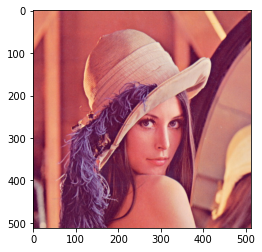

In [99]:
import cv2 as cv
#from google.colab.patches import cv2_imshow
import sys

img = cv.imread("lena.jpg")
if img is None:
    sys.exit("Could not read the image.")
plt.imshow(img[...,::-1])

#It returns a tuple of the number of rows, columns, and channels (if the image is color)
print( img.shape ) # (rows, columns, num_color_channels)

Para acessar o número total de pixels da imagem:

In [100]:
print( img.size,"pixels" )

786432 pixels


Pra exibir o tipo de dado usado na representação de cor de cada pixel:



In [101]:
print( img.dtype )

uint8


### **ACESSO AOS PIXELS DA IMAGEM**

Para acessar as informações (cor) de um pixel, usamos uma linha e uma coluna (o canto superior esquerdo é a origem da imagem [0,0]). Se a imagem for colorida (3 canais), o resultado mostra o valor dos canais B,G e R (nesta ordem).

In [108]:
px = img[100,100]
print( px )

[ 87  74 182]


Para alterar o valor de um pixel, basta indicar sua coordenada (linha,coluna) e atribuir os valores dos canais de cor:

In [109]:
img[100,100] = [255,255,255]
print( img[100,100] )

[255 255 255]


## **============ EXERCÍCIO ===================**

A imagem abaixo está convertida para o espaço de cor de níveis de cinza (cor variando de 0 a 255). Converta esta imagem para preto-e-branco (imagem binária) usando as operações de manipulação de pixel. Se os canais não aparecem, fazemos a suposição que temos apenas um canal de cor.

(512, 512)


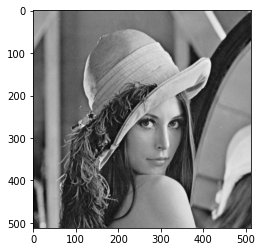

In [111]:
import cv2 as cv
import sys

img = cv.imread("lena.jpg")
if img is None:
    sys.exit("Could not read the image.")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap=plt.cm.gray);

print( gray_img.shape )

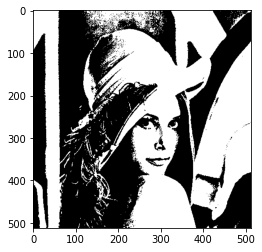

In [120]:
#sua solução
import numpy as np

rows, columns = gray_img.shape
median = np.median(gray_img)

for i in range(rows):
    for j in range(columns):
        if gray_img[i,j] < median:
            gray_img[i,j] = 0
        else:
            gray_img[i,j] = 255
            
plt.imshow(gray_img, cmap=plt.cm.gray)

### **REGION OF INTEREST (ROI)**

Em muitos algoritmos de Processamento Digital de Imagens, estamos interssados em somente trabalhar com uma determinada região da imagem, que é chamado região de interesse (ROI). Para definir uma região de interesse, definimos um slice na matriz que representa internamente a imagem.

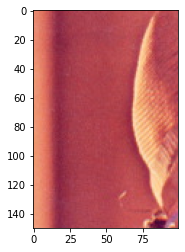

In [125]:
import cv2 as cv
import sys

img = cv.imread("lena.jpg")[...,::-1]
if img is None:
    sys.exit("Could not read the image.")
plt.imshow(img)
roi=img[100:250,50:150]
plt.imshow(roi)

## **============ EXERCÍCIO ===================**

Definir duas ROIs na imagem anterior, para segmentar os dois olhos da Lena.

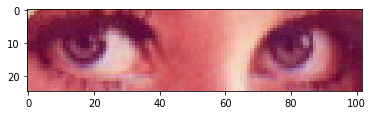

In [141]:
#sua solução
eyes = img[255:280,248:350]
plt.imshow(eyes)

Definir uma ROI qualquer na imagem acima e **copiá-la** para um outro lugar na imagem. 

In [ ]:
#sua solução

### **DECOMPOSIÇÃO E JUNÇÃO DE CANAIS DE COR**

Em muitas situações em Visão Computacional, especialmente para imagens em cores (RGB), podemos querer aplicar procedimentos separados nos canais. A separação (split) e junção (merge) de canais é feita como abaixo.

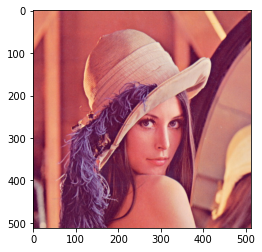

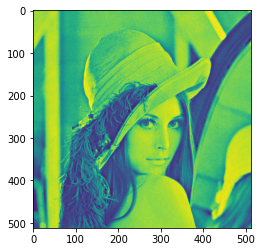

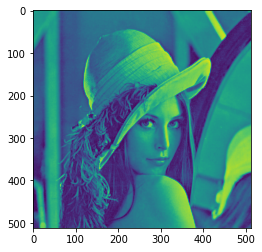

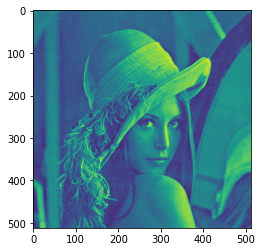

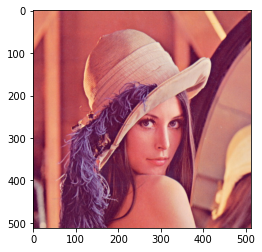

In [148]:
import cv2 as cv
#from google.colab.patches import cv2_imshow
import sys

img = cv.imread("lena.jpg")[...,::-1]
if img is None:
    sys.exit("Could not read the image.")
plt.imshow(img)
plt.show()
b,g,r = cv.split(img)
plt.imshow(b)
plt.show()
plt.imshow(g)
plt.show()
plt.imshow(r)
plt.show()

img = cv.merge((b,g,r))

plt.imshow(img )
plt.show()

### **============ EXERCÍCIO ===================**

A imagem abaixo é uma imagem em níveis de cinza. Construa um programa em OpenCV para colorizar artificialmente esta imagem, gerando uma imagem com três canais de cor B,G e R.

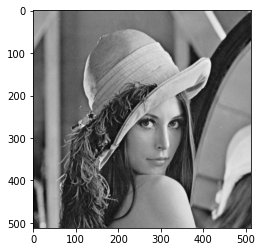

In [151]:
import cv2 as cv
import sys

img = cv.imread("lena.jpg")
if img is None:
    sys.exit("Could not read the image.")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap=plt.cm.gray)

#sua solução